# Панкратьев Иван 18-ИВТ-2

### Лабораторная работа № 2. Методы классификации данных
 

Цель лабораторной работы – получение навыков работы с методами классификации.
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных;приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PRили ROCкривая)
4.	Выполните масштабирование количественных признаков;Постройте диаграммы BoxPlotдля признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех».Оцените точность классификации для каждой их схем. Постройте кривые PRи ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества).Для линейного классификатора используйте регуляризацию.
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Кодировка классификаторов:
1 – классификатор Kближайших соседей (задаётся количество ближайших объектов);
2 – классификатор Kближайших соседей(задаётся радиус для выбора ближайших объектов);
3 – линейный классификатор (персептрон);
4 – логический классификатор (бинарное решающее дерево).
 

#### Вариант 14

Набор данных: 3

Классификаторы: 3, 4

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_decomposition import CCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import load_iris

In [4]:
df = pd.DataFrame({'Названия атрибутов': ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type' ],
                  'Перевод названия': ['Имя', 'Волосяной покров', 'Наличие перьев', 'Откладка яиц', 'Млекопитающее', 'Летающий вид', 'Морской вид', 'Хищник', 'Наличие зубов', 'Хребет', 'Способность дышать', 'Ядовитость', 'Плавники', 'Количество ног', 'Хвост', 'Одомашненность', 'Размер кошки', 'Класс'],
                  'Тип самого атрибута': ['Строчный', 'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный', 'Числа из массива {0,2,4,5,6,8} ', 'Бинарный', 'Бинарный', 'Бинарный', 'Целые числа в диапазоне 1-7']})
df # Умышленно отсутствует тип animal_name - имя животинки, будет использоваться в векторизации позднее

,Названия атрибутов,Перевод названия,Тип самого атрибута
0,animal_name,Имя,Строчный
1,hair,Волосяной покров,Бинарный
2,feathers,Наличие перьев,Бинарный
3,eggs,Откладка яиц,Бинарный
4,milk,Млекопитающее,Бинарный
5,airborne,Летающий вид,Бинарный
6,aquatic,Морской вид,Бинарный
7,predator,Хищник,Бинарный
8,toothed,Наличие зубов,Бинарный
9,backbone,Хребет,Бинарный


Судя по исходным данным, атрибут 16, Класс, в завимости от значения подразумевает следующее: 1 - Млекопитающее, 2 - Птица, 3 - Рептилия, 4 - Рыба, 5 - Амфибия, 6 - Насекомое, 7 - Беспозвоночное

In [5]:
zoodf = pd.read_csv('zoo.csv')
zoodf.sample (10) 

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
92,tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
56,ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
63,platypus,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0,1,1
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
zoodf.count().max() # Количество строк первоначально, до удаления повторов


101

### Удаление дубликатов

In [7]:
zoodf1 = zoodf.drop_duplicates()
print ('Количество строк, после удаления повторов:', zoodf1.count().max())

Количество строк, после удаления повторов: 101


### Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PRили ROCкривая)

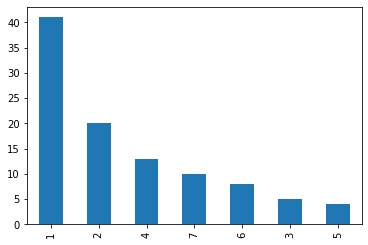

In [8]:
zoodf1.class_type.value_counts().plot(kind = 'bar')

По гистограмме видно, что сильно выделяются по количеству животные первой группы - млекопитающие, остальные группы тоже не очень сбалансированы, поэтому буду использовать PR-кривую. Предположительно, в случае несбалансированности данных, она должна быть лучше.

### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

3 – линейный классификатор (персептрон);
4 – логический классификатор (бинарное решающее дерево).


In [9]:
zoodf1.describe() # нормальизирую признаки

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
numerical_columns = [i for i in zoodf1.columns if zoodf1[i].dtype.name != 'object']
categorial_columns = [i for i in zoodf1.columns if zoodf1[i].dtype.name == 'object']
print('Количественные: ', numerical_columns)
print('Категориальные: ', categorial_columns)

Количественные:  ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
Категориальные:  ['animal_name']


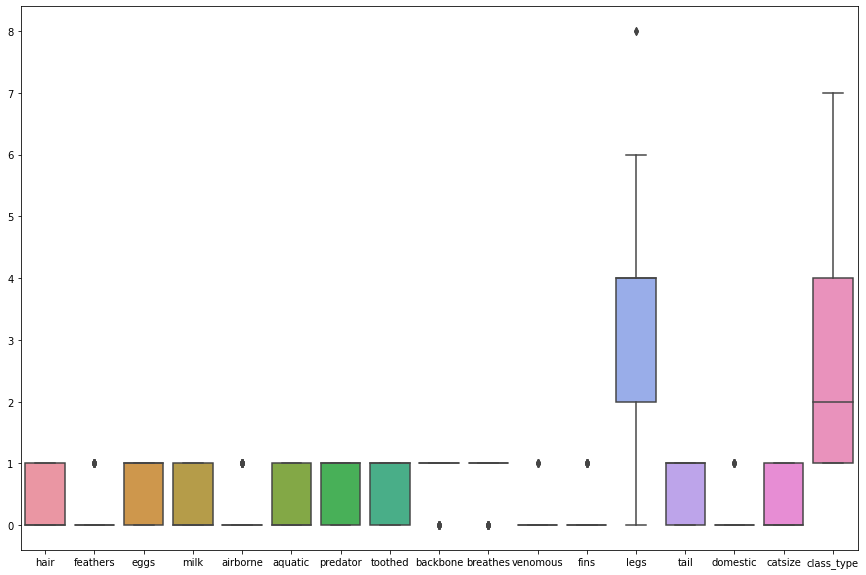

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=zoodf1[numerical_columns]) # вид графика до масштабирования

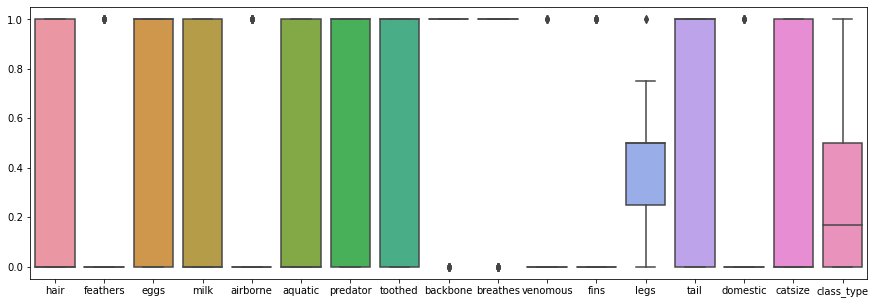

In [12]:
scaler = preprocessing.MinMaxScaler()
zoodf1[numerical_columns] = scaler.fit_transform(zoodf1[numerical_columns].values.astype(float))
plt.figure(figsize=(15,5))
sns.boxplot(data=zoodf1[numerical_columns]) # Вид гистограммы после масштабирования

### Выполните замену категориальных признаков;

In [13]:
zoodf1[categorial_columns].describe()

,animal_name
count,101
unique,100
top,frog
freq,2


In [14]:
for c in categorial_columns:
    print (zoodf1[c].unique())

['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']


Т.к. "имён" зверей много, то используем векторизацию:

In [15]:
zoodfdum = pd.get_dummies(zoodf1[categorial_columns])

print (zoodfdum.sample(10))

    animal_name_aardvark  animal_name_antelope  animal_name_bass  \
36                     0                     0                 0   
98                     0                     0                 0   
16                     0                     0                 0   
8                      0                     0                 0   
54                     0                     0                 0   
28                     0                     0                 0   
44                     0                     0                 0   
95                     0                     0                 0   
96                     0                     0                 0   
5                      0                     0                 0   

    animal_name_bear  animal_name_boar  animal_name_buffalo  animal_name_calf  \
36                 0                 0                    0                 0   
98                 0                 0                    0                 0   
16      

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


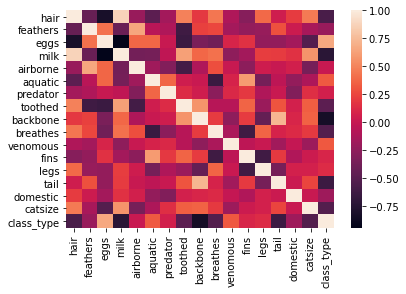

In [16]:
sns.heatmap(zoodf1.corr()) # До векторизации признака "имя"
zoodf1.corr()

,animal_name_aardvark,animal_name_antelope,animal_name_bass,animal_name_bear,animal_name_boar,animal_name_buffalo,animal_name_calf,animal_name_carp,animal_name_catfish,animal_name_cavy,...,animal_name_tuatara,animal_name_tuna,animal_name_vampire,animal_name_vole,animal_name_vulture,animal_name_wallaby,animal_name_wasp,animal_name_wolf,animal_name_worm,animal_name_wren
animal_name_aardvark,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
animal_name_antelope,-0.01,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
animal_name_bass,-0.01,-0.01,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
animal_name_bear,-0.01,-0.01,-0.01,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
animal_name_boar,-0.01,-0.01,-0.01,-0.01,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
animal_name_wallaby,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,1.00,-0.01,-0.01,-0.01,-0.01
animal_name_wasp,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1.00,-0.01,-0.01,-0.01
animal_name_wolf,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1.00,-0.01,-0.01
animal_name_worm,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1.00,-0.01


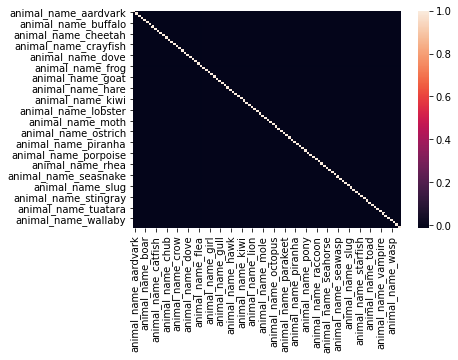

In [17]:
sns.heatmap(zoodfdum.corr()) # График получившийся при векторизации атрибута "Имя животного". Уверен, 
                             # что это не эффективно и в дальнейшем буду использовать zoodf1 без столбца имён зверей
zoodfdum.corr()

### Заполните пропущенные значения в данных;

In [44]:
zoodf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   animal_name  101 non-null    object 
 1   hair         101 non-null    float64
 2   feathers     101 non-null    float64
 3   eggs         101 non-null    float64
 4   milk         101 non-null    float64
 5   airborne     101 non-null    float64
 6   aquatic      101 non-null    float64
 7   predator     101 non-null    float64
 8   toothed      101 non-null    float64
 9   backbone     101 non-null    float64
 10  breathes     101 non-null    float64
 11  venomous     101 non-null    float64
 12  fins         101 non-null    float64
 13  legs         101 non-null    float64
 14  tail         101 non-null    float64
 15  domestic     101 non-null    float64
 16  catsize      101 non-null    float64
 17  class_type   101 non-null    float64
dtypes: float64(17), object(1)
memory usage: 18.6+ KB


Пропущенные данные отсутствуют

### Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех».Оцените точность классификации для каждой из схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

In [69]:
zoodf1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,0.500000
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.000000
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,0.000000
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,0.833333
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,1.000000


In [133]:
# разделим полученные данные на данные для обучения и теста
x, y = zoodf1.drop('predator', axis=1), zoodf1['predator']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

### Бинарное решающее дерево

In [81]:
dtc = DecisionTreeClassifier()

dtc_grid = GridSearchCV(dtc, {'max_depth': list(range(1, 5)), 'max_features': list(range(1, 5))})
dtc_grid.fit (x_train, y_train)
best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_

print('best score:', best_score, 
      ', features number:', best_features,
      ', depth:', best_depth)
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(x_train, y_train)
best_score = np.mean(y_test == dtc.predict(x_test))
print('test score:', best_score)

best score: 0.7000000000000001 , features number: 2 , depth: 4
test score: 0.6774193548387096


### Персептрон

In [127]:
clf_perceptron = OneVsRestClassifier(linear_model.Perceptron())
ppn = Perceptron()
params = {
      'estimator__alpha': np.linspace(0, 1, 10)[1:],
      'estimator__max_iter': [(x+1)*10 for x in range(10)],
      }
param_search = GridSearchCV(estimator=clf_perceptron, param_grid=params)
param_search.fit(x_train, y_train)
y_score = param_search.best_estimator_.fit(x_train, y_train).decision_function(x_test)
print('Accuracy: {}'.format(accuracy_score(param_search.best_estimator_.predict(x_test), y_test)))
print('Best score: {}'.format(param_search.best_score_))

## Ругается на количество итераций, но ответ выдаёт:
##Accuracy: 0.6451612903225806
##Best score: 0.6714285714285715

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-pa

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Accuracy: 0.6451612903225806
Best score: 0.6714285714285715


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-pa

### Графики

In [134]:
y_test_inversion = [1-y for y in y_test]

prob_dtc = dtc.predict_proba(x_test)

cppn = CalibratedClassifierCV(ppn, cv=10)
cppn.fit(x_train, y_train)
ppn_proba = cppn.predict_proba(x_test)

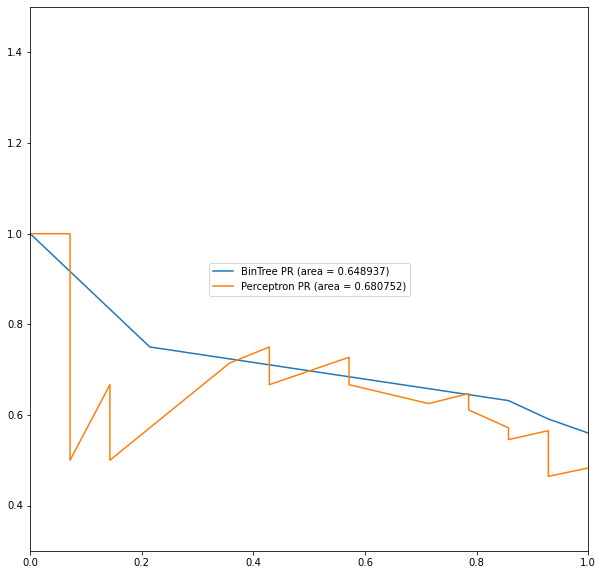

In [167]:

def Pr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))
plt.figure(figsize=(10,10))


Pr(prob_dtc, 0, 'BinTree', y_test_inversion)
Pr(ppn_proba, 0, 'Perceptron', y_test_inversion)

plt.xlim([0.0, 1.0])
plt.ylim([0.3, 1.5])
plt.legend(loc=10, fontsize='medium')
plt.show()

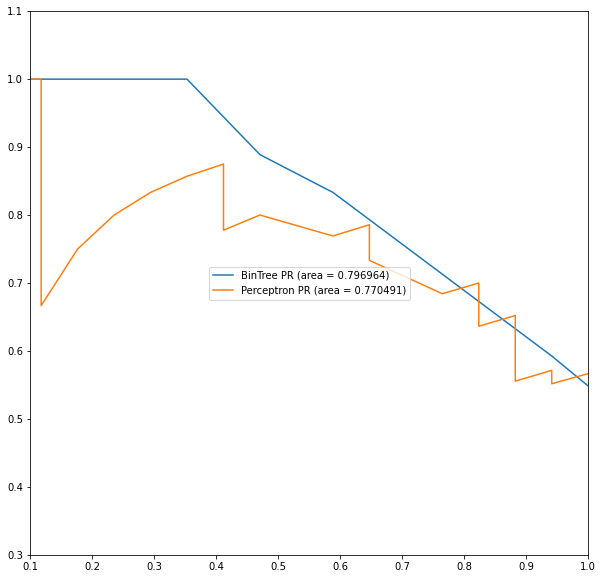

In [169]:
plt.figure(figsize=(10,10))

Pr(prob_dtc, 1, 'BinTree', y_test)
Pr(ppn_proba, 1, 'Perceptron', y_test)

plt.xlim([0.1, 1.0])
plt.ylim([0.3, 1.1])
plt.legend(loc=10, fontsize='medium')
plt.show()

In [179]:
def ROC(prob, occupancy, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, occupancy])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

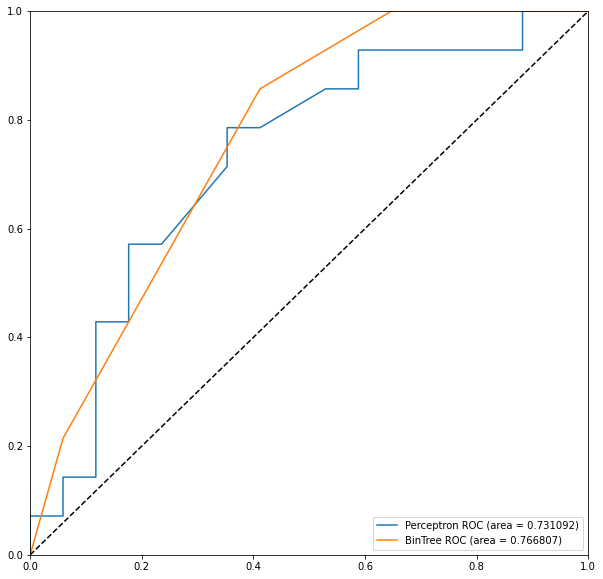

In [180]:
plt.figure(figsize=(10,10))

ROC(ppn_proba, 0, 'Perceptron', y_test)
ROC(prob_dtc, 0, 'BinTree', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

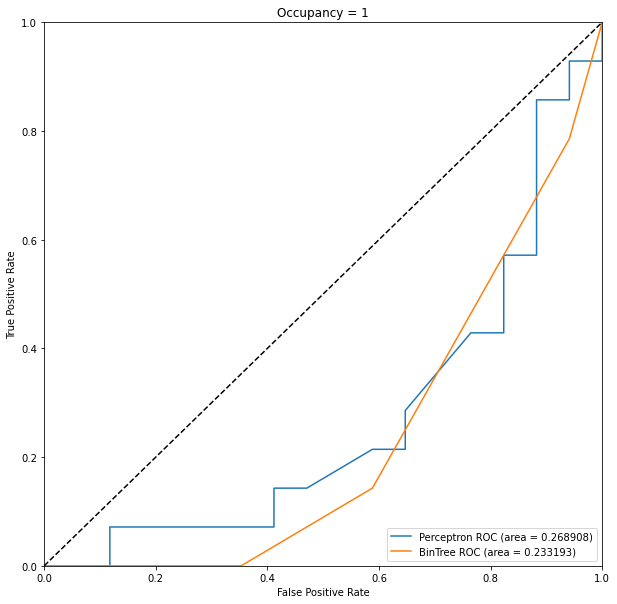

In [184]:

plt.figure(figsize=(10,10))

ROC(ppn_proba, 1, 'Perceptron', y_test)
ROC(prob_dtc, 1, 'BinTree', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()

Судя по полученным данным, лучший результат показывало бинарное дерево